In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
def second_turn(label,dif):
    if label>0:
        return 0
    if label==0:
        return dif
def fturn(df):
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
def fturn_test():
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0

In [3]:
training_set=os.listdir("./training_set_df_acc_window8/")
# training_set=['./gan_win6.csv','./gan_win6.csv']
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc_window8/{data}"
        if df is None:
            df=pd.read_csv(file)
            df=df.astype(float)
            print(df.shape)
            df['previous_label']=df['label']
            
            df['label']=df['label'].astype("category")
            df['previous_label']=df['label']
            df['previous_label']=df['previous_label'].astype(int)
            df['second_turn']=df['previous_label'].diff()
            df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
            turn=list(df['second_turn'])
            turn_2=[]
            
            if (df['label'][0].item()>0): 
                count=2
            else: 
                count=1
            for i in range(len(turn)):

                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            df['turn']=turn
            df['second_turn']=turn_2
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(df)
            sturn=True
            for i in range(len(df.label)):

                if (list(df['label'])[i]==1)|(list(df['label'])[i]==2)|(list(df['label'])[i]==3):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            df['after1']=after1
            after4=[]
            after0=fturn(df)
            sturn=True
            for i in range(len(df['label'])):
                if (list(df['label'])[i]==4)|(list(df['label'])[i]==5)|(list(df['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            df['after4']=after4
            
        else:
            d=pd.read_csv(file)
            d['previous_label']=d['label']
            d['previous_label']=d['previous_label'].astype(int)
            d['label']=d['label'].astype("category")
            d['second_turn']=d['previous_label'].diff()
            d['second_turn']=d.apply(lambda d:second_turn(d['label'],d['second_turn']),axis=1)
            turn=list(d['second_turn'])
            turn_2=[]
            if (d['label'][0].item()>0): 
                count=2
            else: count=1
            for i in range(len(turn)):
                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            d['second_turn']=turn_2
            d['turn']=turn
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(d)
            sturn=True
            for i in range(len(d.label)):

                if (list(d['label'])[i]==1)|(list(d['label'])[i]==2)|(list(d['label'])[i]==3):
                    after0-=1
                if (list(d['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            d['after1']=after1
            after4=[]
            after0=fturn(d)
            sturn=True
            for i in range(len(d['label'])):
                if (list(d['label'])[i]==4)|(list(d['label'])[i]==5)|(list(d['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            d['after4']=after4
            df=pd.concat([df,d])
# # turn2
# df['previous_label']=df['label']
# df['second_turn']=df['previous_label'].diff()
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
# turn=list(df['second_turn'])
# turn_2=[]

# if (df['label'][0].item()>0): 
#     count=2
# else: 
#     count=1
# for i in range(len(turn)):

#     if turn[i]<-3:
#         count-=1
#     if count<=0:
#         turn_2.append(1) 
#     else:
#         turn_2.append(0) 
# df['turn']=turn
# df['second_turn']=turn_2




(154, 4342)


In [4]:
df[['label','second_turn','turn','after1']].to_csv('./check/check.csv')

In [5]:
df=df.drop(['second_turn','turn'],axis=1)

In [6]:
# df=df.astype(float)
# df['previous_label']=df['label']
# df['label']=df['label'].astype(int)
# df['label']=df['label'].astype("category")
# df['second_turn']=df['previous_label'].diff
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['dif']))
# turn=list(df['second_turn'])

In [7]:
# is_2=False
# turn_2=[]
# for i in len(turn):
#     if turn[i]>2:
#         is_2=True
#     if !is_2:
#         return 0
#     return 1
# df['second_turn']=turn_2

In [8]:
test=pd.read_csv('./test_set_df_acc_window8/S08T2.csv')


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2817 entries, 0 to 124
Data columns (total 4344 columns):
 #     Column                                             Dtype  
---    ------                                             -----  
 0     left_elbow_shoulder_hip mean_ft                    float64
 1     left_elbow_shoulder_hip std_ft                     float64
 2     left_elbow_shoulder_hip max_ft                     float64
 3     left_elbow_shoulder_hip min_ft                     float64
 4     left_elbow_shoulder_hip var_ft                     float64
 5     left_elbow_shoulder_hip med_ft                     float64
 6     left_elbow_shoulder_hip sum_ft                     float64
 7     left_elbow_shoulder_hip kurtosis                   float64
 8     left_elbow_shoulder_hip skew                       float64
 9     left_elbow_shoulder_hip quantile 25                float64
 10    left_elbow_shoulder_hip quantile 75                float64
 11    left_elbow_shoulder_hip RMS     

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

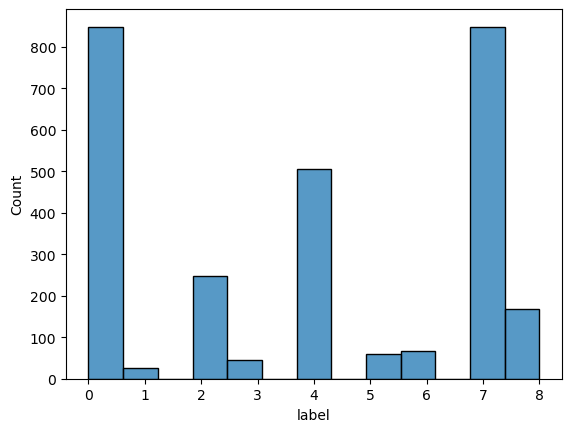

In [10]:
sns.histplot(df["label"])

In [11]:
X=df.drop(["label","previous_label",'after1','after4'],axis=1)
y=df['label']

In [12]:
X.shape

(2817, 4340)

In [13]:
y.shape

(2817,)

In [14]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [15]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [17]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [18]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [19]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [20]:
from sklearn.feature_selection import SelectKBest,f_regression
# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(300,columns="F_Score"))
# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

                                       Input_Features      F_Score
4218  movingright_shoulder right_wrist dy quantile25e  2232.801787
4194          movingright_shoulder right_wrist dx mae  2091.255925
4184       movingright_shoulder right_wrist dx var_ft  2091.255925
4198  movingright_shoulder right_wrist dx quantile25e  2080.020681
4204       movingright_shoulder right_wrist dy var_ft  2054.786084
...                                               ...          ...
483                               left_elbow_y min_ft  1155.149338
3542                    movingright_shoulder_x max_ft  1144.874581
3998    movingright_shoulder right_ear dx quantile25e  1142.690620
3940         movingright_shoulder left_ear dx mean_ft  1140.633362
3946          movingright_shoulder left_ear dx sum_ft  1140.633362

[300 rows x 2 columns]


In [21]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']


In [22]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)



In [23]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

In [24]:
a=[e for e in X_train if e not in X_test]
a

[]

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        52
           1       0.50      0.33      0.40         3
           2       1.00      0.72      0.84        18
           3       0.00      0.00      0.00         0
           4       0.42      0.58      0.49        24
           5       0.33      0.25      0.29         4
           6       0.67      0.67      0.67         3
           7       0.73      0.69      0.71        32
           8       0.38      0.75      0.50         4

    accuracy                           0.64       140
   macro avg       0.53      0.52      0.51       140
weighted avg       0.69      0.64      0.66       140



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

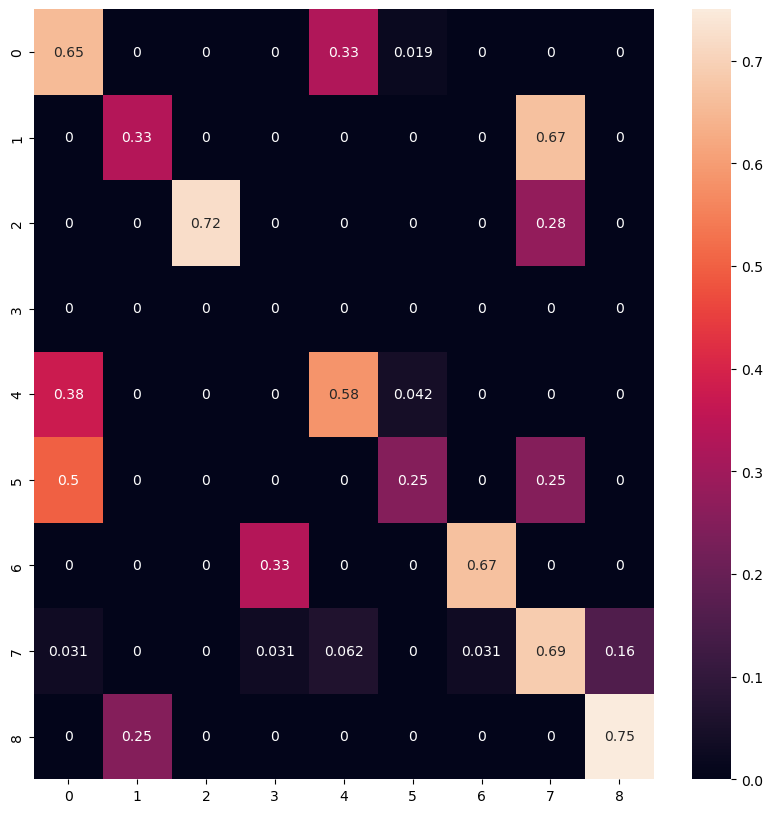

In [25]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost import callback
early_stop = callback.EarlyStopping(
    rounds=4, metric_name='mlogloss', save_best=True
)
try:
    filename = './model_window8/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    pred_xgb=xgbcl.predict(X_test)
except:
    xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,callbacks=[early_stop])
    xgbcl.fit(all_feature_smote, all_label_smote,eval_set=[(X_test, y_test)])
    pred_xgb=xgbcl.predict(X_test)

from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [26]:
# X_train_with_predictions.shape

In [27]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='aucs‌', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [28]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [29]:
filename = './model_window8/smote_xgb_model2.sav'
joblib.dump(xgbcl, filename)

['./model_window8/smote_xgb_model2.sav']

              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        60
         1.0       0.50      0.33      0.40         3
         2.0       1.00      0.65      0.79        20
         3.0       0.00      0.00      0.00         0
         4.0       0.39      0.59      0.47        22
         5.0       0.00      0.00      0.00         2
         6.0       0.33      1.00      0.50         1
         7.0       0.73      0.79      0.76        28
         8.0       0.25      0.50      0.33         4

    accuracy                           0.62       140
   macro avg       0.44      0.49      0.43       140
weighted avg       0.70      0.62      0.64       140



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

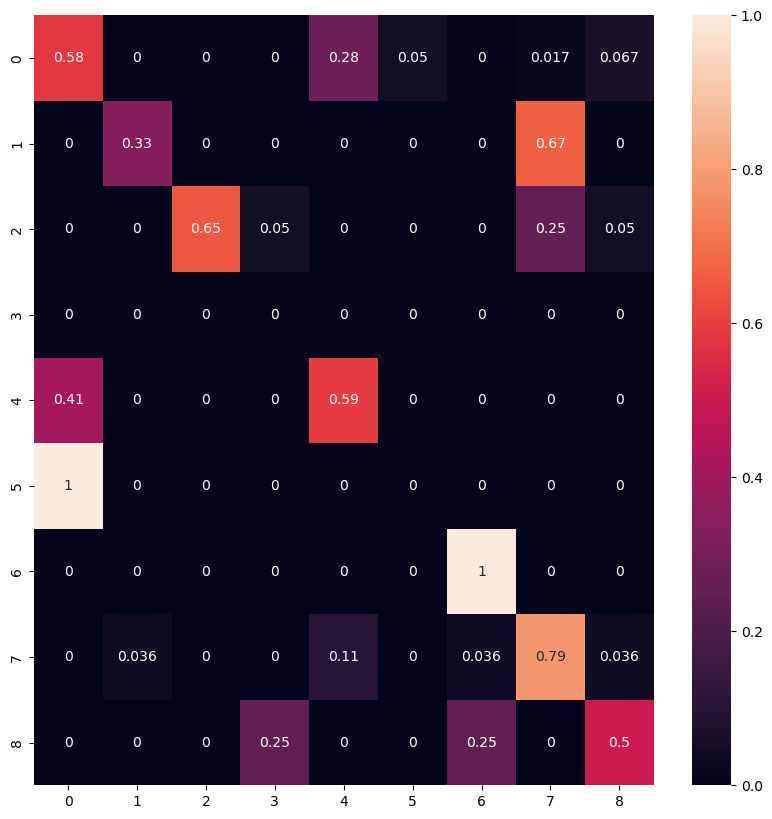

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
# HGBC.fit(X_train,y_train)
try:
    filename = './model_window8/smote_HGBC_model2.sav'
    HGBC=joblib.load(filename)
    pred=HGBC.predict(X_test)
except:
    HGBC.fit(all_feature_smote, all_label_smote )
    pred=HGBC.predict(X_test)


print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [31]:
filename = './model_window8/smote_HGBC_model2.sav'
joblib.dump(HGBC, filename)

['./model_window8/smote_HGBC_model2.sav']

In [32]:
# def predict0_4(df):
# #     print(df['label_pred'])
# #     print(df['label_pred'] in [1,2,3,5,6,7,8])
#     if df['previous_label'] in [1,2,3,5,6,7,8]:
#         return df['previous_label']
#     else:
# #         print(np.array(df.drop(["label","previous_label",'label_pred'])))
# # xgb_class0_4
#         return xgbcl.predict(np.array(df.drop(["label",'previous_label'
#                                     ])).reshape(1,-1)).view().item()

In [33]:
# from sklearn.ensemble import AdaBoostClassifier
# test['previous_label']=pred_xgb
# # test['previous_label']=list(pred_xgb).insert(0,0)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label",'previous_label'],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4=np.array(X_train_class0_4)
# y_train_class0_4=np.array(y_train_class0_4)
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# xgb_class0_4=RandomForestClassifier(random_state=10,n_estimators=30,criterion='gini')#XGBClassifier( eval_metric='logloss', random_state=10)
# try:
#     print('sm')
# #     xgb_class0_4.fit(X_train_class0_4sm, y_train_class0_4sm)
# except:
#     print('no sm')
# #     xgb_class0_4.fit(X_train_class0_4, y_train_class0_4)
# test['label_pred']=test.apply(lambda x:predict0_4(x),axis=1)

# # test_class0_4=test[(test['label_pred'].isin([0,4]))&(test['label'].isin([0,4]))]
# # X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# # y_test_class0_4=test_class0_4.label
# # # X_test_class0_4=np.array(X_test_class0_4)
# # # y_test_class0_4=np.array(y_test_class0_4)

# # pred_class0_4=xgb_class0_4.predict(X_test_class0_4)
# print(metrics.classification_report(test['label'],test['label_pred']))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(test['label'],test['label_pred'], normalize='true')
# sns.heatmap(conf,annot=True)

In [34]:
test['label1']=pred
# turn2
test['previous_label']=test['label1']
test['second_turn']=test['previous_label'].diff()
test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
turn=list(test['second_turn'])
turn_2=[]

if (test['label'][0].item()>0): 
    count=2
else: 
    count=1
for i in range(len(turn)):

    if turn[i]<-3:
        count-=1
    if count<=0:
        turn_2.append(1) 
    else:
        turn_2.append(0) 
test['turn']=turn
test['second_turn']=turn_2
            
print(list(test['label'])[0])
def fturn_test():
    if list(test['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
after0=fturn_test()
sturn=True
after1=[]
after4=[]
for i in range(len(test['label'])):

    if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after1.append(1) 
    else:
        after1.append(0) 
after0=fturn_test()
sturn=True
for i in range(len(test['label'])):
    if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after4.append(1) 
    else:
        after4.append(0) 


test['after1']=after1
test['after4']=after4
test=test.drop(['second_turn','turn'],axis=1)

8


In [35]:
X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test_a=test['label']

X=df.drop(["label","previous_label"],axis=1)
y=df['label']
X_train_a=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train_a=y

all_feature_smote_a, all_label_smote_a = sm.fit_resample(X_train_a,y_train_a)

              precision    recall  f1-score   support

         0.0       0.46      0.81      0.58        26
         1.0       0.50      0.50      0.50         2
         2.0       0.54      1.00      0.70         7
         3.0       0.00      0.00      0.00         0
         4.0       0.91      0.61      0.73        49
         5.0       0.33      0.17      0.22         6
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.67      0.80        45
         8.0       0.25      0.67      0.36         3

    accuracy                           0.67       140
   macro avg       0.52      0.60      0.52       140
weighted avg       0.79      0.67      0.69       140



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

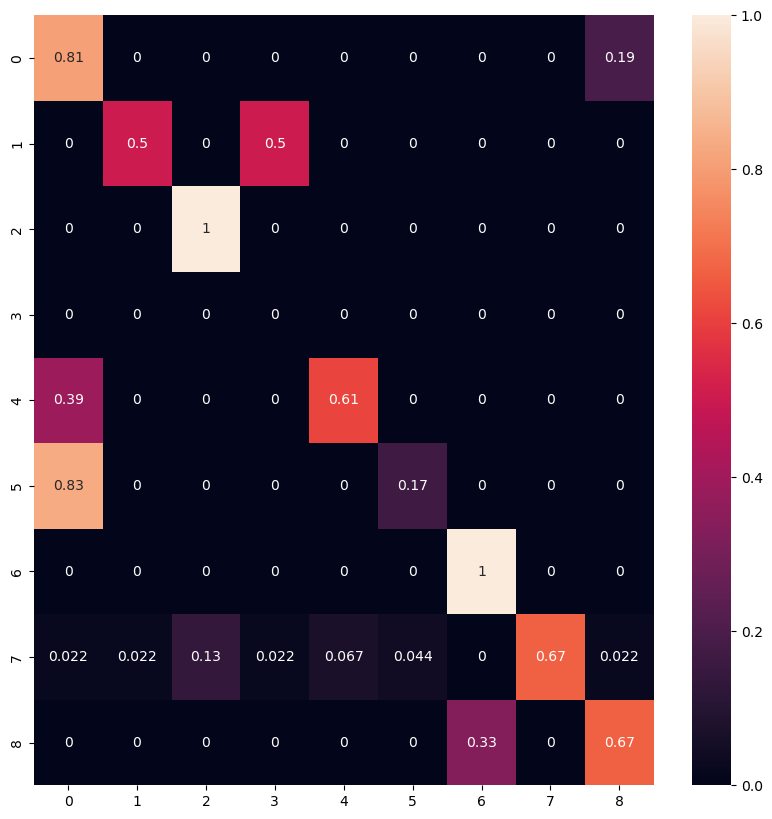

In [36]:
try:
    filename = './model_window8/smote_HGBC_model_after.sav'
    HGBC=joblib.load(filename)
    pred_a=HGBC.predict(X_test_a)
except:
    print('learning')
    HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
    HGBC.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=HGBC.predict(X_test_a)


print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [37]:
# XGB=RandomForestClassifier(random_state=10)
# XGB.fit(all_feature_smote_a, all_label_smote_a)

# pred_b=XGB.predict(X_test_a)

# print(metrics.classification_report(pred_b,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_b,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [38]:
filename = './model_window8/smote_HGBC_model_after.sav'
joblib.dump(HGBC, filename)

['./model_window8/smote_HGBC_model_after.sav']

              precision    recall  f1-score   support

           0       0.46      0.81      0.58        26
           1       0.50      1.00      0.67         1
           2       0.62      1.00      0.76         8
           3       0.00      0.00      0.00         0
           4       0.91      0.60      0.72        50
           5       0.67      0.25      0.36         8
           6       0.67      1.00      0.80         2
           7       1.00      0.73      0.85        41
           8       0.25      0.50      0.33         4

    accuracy                           0.69       140
   macro avg       0.56      0.65      0.56       140
weighted avg       0.80      0.69      0.70       140



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

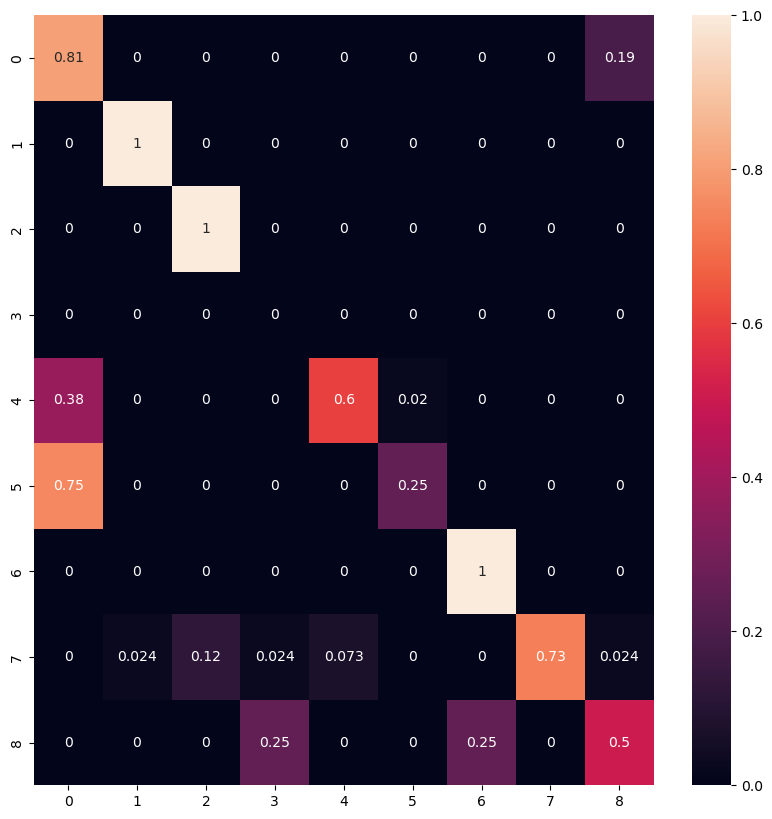

In [39]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from seqlearn.perceptron import StructuredPerceptron

try:
    filename = './model_window8/smote_xgb_model_after.sav'
    xgbafter=joblib.load(filename)
    pred_a=xgbafter.predict(X_test_a)
except:
    print('learning')
    xgbafter=XGBClassifier( eval_metric='mlogloss', random_state=10)
    xgbafter.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=xgbafter.predict(X_test_a)
    
print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [40]:
filename = './model_window8/smote_xgb_model_after.sav'
joblib.dump(xgbafter, filename)

['./model_window8/smote_xgb_model_after.sav']

In [41]:
# from sklearn.ensemble import GradientBoostingClassifier
# # import six
# # import sys
# # sys.modules['sklearn.externals.six'] = six
# # from seqlearn.perceptron import StructuredPerceptron

# try:
#     filename = './model_window8/smote_ada_model_after.sav'
#     ada=joblib.load(filename)
#     pred_a=ada.predict(X_test_a)
# except:
    
#     print('learning')
#     ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     ada.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=ada.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [42]:
# filename = './model_window8/smote_ada_model_after.sav'
# joblib.dump(ada, filename)

In [43]:
# from sklearn.model_selection import GridSearchCV
# filename = './model_window8/smote_grid_model_after.sav'
# try:
#     clf=joblib.load(filename)
#     pred_a=clf.predict(X_test_a)  
# except:

#     parameters = {
#         "loss":[ 'log_loss'],
#         "learning_rate": [ 0.1, 0.5, 0.2,0.05,0.01],#0.01, 0.025, 0.05, 0.075,
# #         "min_samples_split": np.linspace(0.1, 0.5, 12),
# #         "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#         "max_depth":[8,50],
#         "max_features":["log2","sqrt"],
#         "criterion": ["friedman_mse",  'squared_error']
# #         "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
# #         "n_estimators":[10]
#         }
#     clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     clf.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=clf.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [44]:
# filename = './model_window8/smote_grid_model_after.sav'
# joblib.dump(ada, filename)

In [45]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier,RandomTreesEmbedding,ExtraTreesClassifier,RandomForestClassifier
# VC=VotingClassifier(estimators=[('HGBC',HGBC),
#                                  ('XGB',xgbafter),
#                                ('RTE',ExtraTreesClassifier()),
#                                ('RF',RandomForestClassifier()),
#                                ('BG',BaggingClassifier())],
#                     weights=[7,7,5,5,5],
#                     voting='soft'
#                    )
# filename = './model_window8/smote_VC2_model_after.sav'
# try:
#     VC=joblib.load(filename)
#     pred_a=VC.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     VC.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=VC.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [46]:
# filename = './model_window8/smote_VC2_model_after.sav'
# joblib.dump(VC, filename)

In [47]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,RandomTreesEmbedding,ExtraTreesClassifier
# RTE=ExtraTreesClassifier()

# filename = './model_window8/smote_RTE_model_after.sav'
# try:
#     RTE=joblib.load(filename)
#     pred_a=RTE.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     RTE.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=RTE.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [48]:
# filename = './model_window8/smote_RTE_model_after.sav'
# joblib.dump(RTE, filename)

In [49]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [50]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [51]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [52]:
# from keras.layers import TimeDistributed
# # # trainX=np.array(X_train)
# # testX=np.array(X_test)
# # # trainY=np.array(y_train)
# # testY=np.array(y_test)
# # trainX=np.array(all_feature_smote)
# # trainY=np.array(all_label_smote)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label","previous_label"],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# trainX=np.array(X_train_class0_4sm)
# trainY=np.array(y_train_class0_4sm)

# test_class0_4=test[test['label'].isin([0,4])]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# testX=np.array(X_test_class0_4)
# testY=np.array(y_test_class0_4)

# # # testY = tf.keras.utils.to_categorical(testY)
# # # trainY = tf.keras.utils.to_categorical(trainY)
# # trainX = np.expand_dims(trainX, 2)
# # testX = np.expand_dims(testX, 2)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Input(shape=(len(trainX[1]), 1)))
# model.add(layers.Conv1D(64,64, activation='relu'))
# # model.add(LSTM(units=3, return_sequences=True))
# # model.add(LSTM(units=64, return_sequences=True))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(32, 32, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(LSTM(units=32, return_sequences=True))
# model.add(LSTM(units=16, return_sequences=True))
# model.add(Dropout(0.5))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# mcp_save = ModelCheckpoint('DL_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping,mcp_save])

In [53]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [54]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [55]:
# model_rnn = Sequential()
# model_rnn.add(LSTM(units=64, return_sequences=True, input_shape=(len(trainX[1]), 1)))
# model_rnn.add(Conv1D(128, 6))
# model_rnn.add(LSTM(units = 64, return_sequences = True))
# model_rnn.add(Dropout(0.2))
# model_rnn.add(Conv1D(128, 3))
# model_rnn.add(LSTM(units = 64, return_sequences = True))

# model_rnn.add(Dropout(0.2))
# model_rnn.add(LSTM(units = 64))

# model_rnn.add(Dense(units = 128))
# model_rnn.add(Dense(units = 64))

# model_rnn.add(Dense(units = 9, activation="softmax")) #4 as the output classes

# # Define the BRNN model with LSTM layers
# model_brnn = keras.Sequential([
#     layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True), 
#                          input_shape=(len(trainX[1]), 1)),
# #     layers.Bidirectional(layers.LSTM(64, activation='relu')),
# #     layers.Bidirectional(layers.LSTM(32, activation='relu')),
#     layers.Bidirectional(layers.LSTM(16, activation='relu')),
    
#     layers.Dense(9, activation='softmax')
# ])

In [56]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Compile the RNN model
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the BRNN model
# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the RNN model with early stopping

# ## model_rnn.fit(all_feature, all_label, epochs=100, batch_size=500, validation_data=(X_vad, y_vad), callbacks=[early_stopping])

# # Train the BRNN model with early stopping

# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # history_brnn=model_brnn.fit(trainX,trainY, epochs=10, batch_size=500,
# #                             validation_data=(testX,testY), callbacks=[early_stopping])
# # , callbacks=[early_stopping]

In [57]:
# history_rnn=model_rnn.fit(trainX,trainY, epochs=20,
#                             validation_data=(testX,testY), callbacks=[early_stopping])


In [58]:
len(all_label_smote)

7641

In [59]:
# import scipy
# pred_aa=pd.Series(pred_a)
# pred_aa=pred_aa.rolling(3, min_periods=1).apply(scipy.stats.mode)
# pred_aa=pred_aa.apply(np.ceil)
# pred_aa=np.array(pred_aa)
# print(metrics.classification_report(pred_aa,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_aa,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [60]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window8/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window8/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn_test():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window8/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.683824,0.677373,0.684932,NaN,0.600000,0.333333,0.692308,0.400000,0.750000,0.746269,0.888889
1,S08T2,0.671429,0.650396,0.583333,0.500000,0.700000,NaN,0.731707,0.222222,0.800000,0.800000,0.363636
2,N11T1,0.780488,0.776899,0.682927,NaN,0.888889,0.500000,0.631579,NaN,NaN,0.965517,0.833333
3,N11T2,0.950000,0.933935,0.978723,NaN,1.000000,NaN,0.880000,NaN,1.000000,1.000000,0.909091
4,N06T1,0.580645,0.559361,0.636364,NaN,NaN,NaN,0.545455,NaN,NaN,0.619048,0.903226
5,S02T2,0.718182,0.715910,0.701754,NaN,0.600000,0.500000,0.680000,0.571429,0.500000,0.833333,0.761905
6,N06T2,0.807692,0.786334,0.814815,NaN,0.500000,1.000000,0.777778,NaN,0.666667,0.865979,0.916667
7,S02T1,0.639706,0.630405,0.638889,0.666667,0.480000,0.285714,0.709677,0.307692,0.400000,0.830769,0.461538
8,N02T2,0.759259,0.744174,0.653061,NaN,0.666667,NaN,0.677966,0.500000,1.000000,0.925373,0.941176
9,N02T1,0.791304,0.782009,0.641509,NaN,0.666667,NaN,0.709677,0.500000,1.000000,0.942857,1.000000


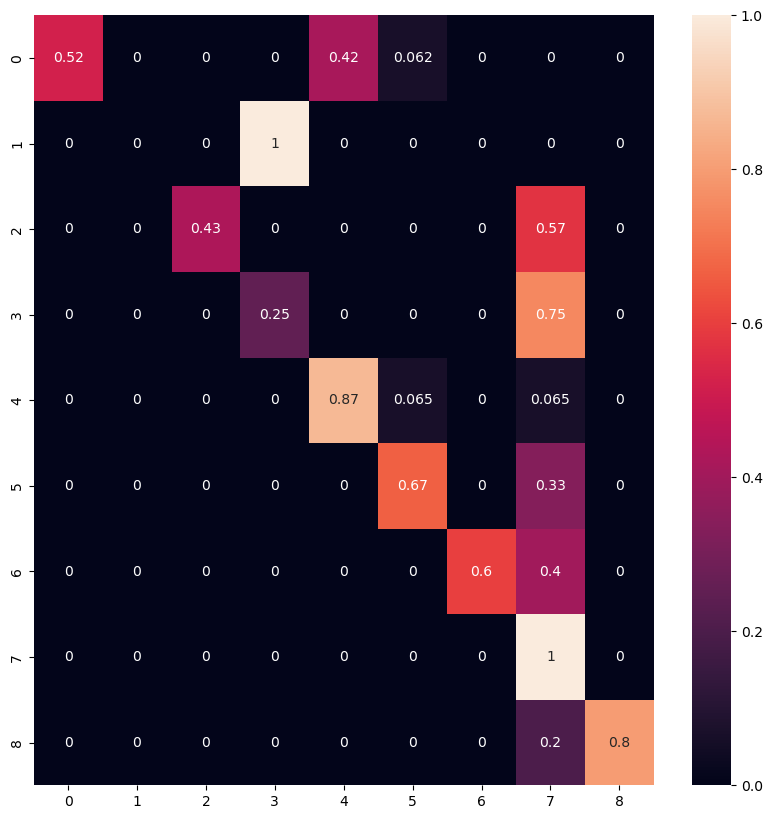

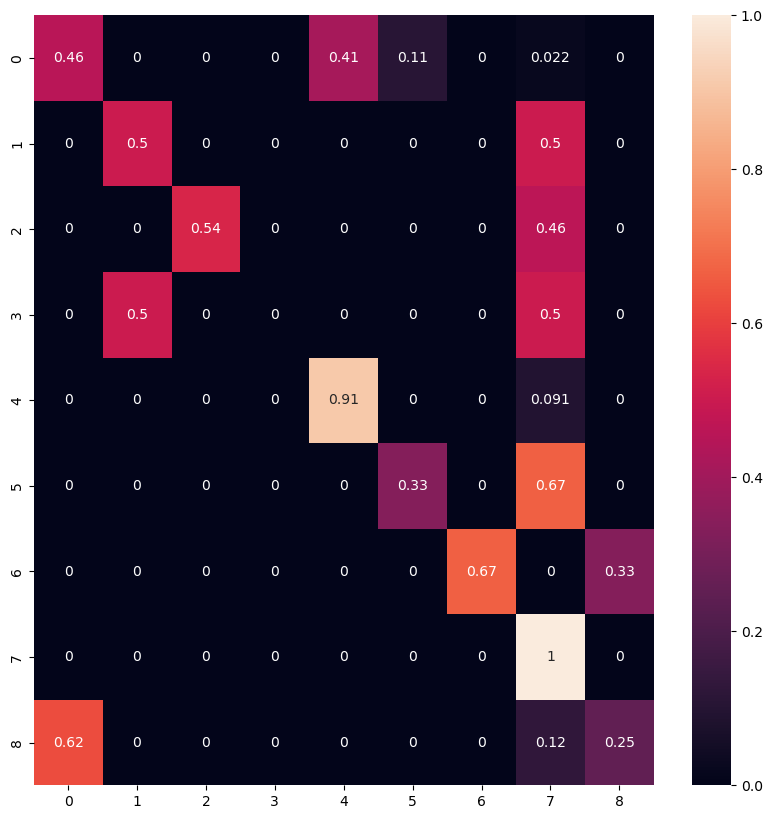

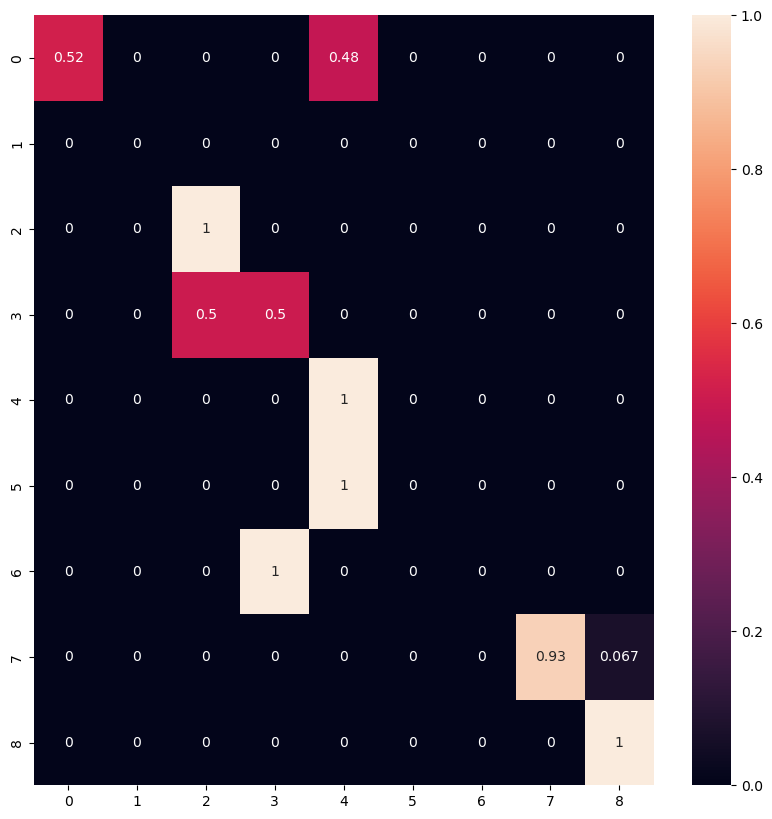

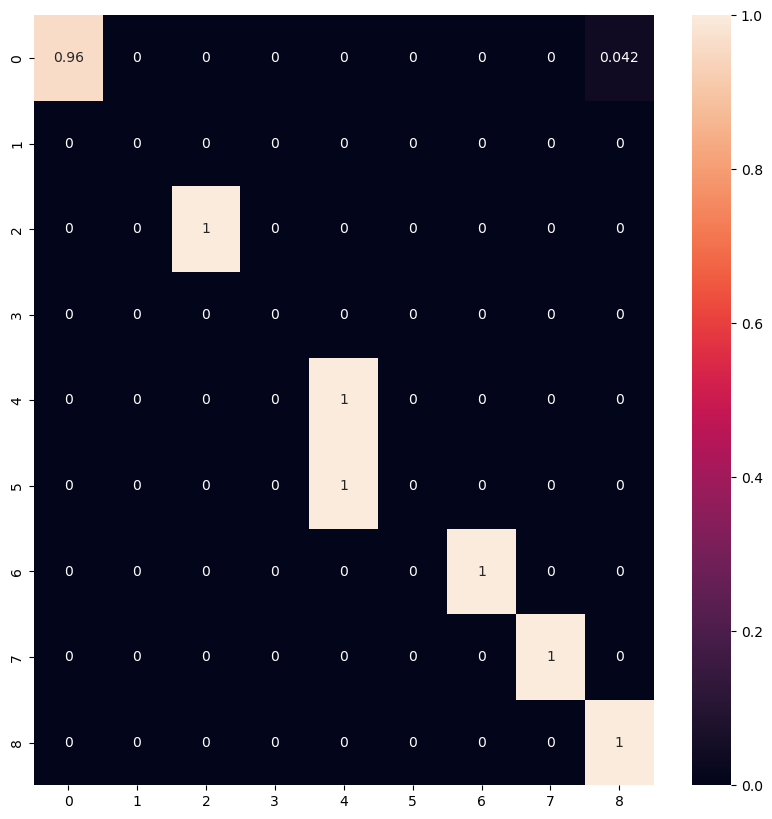

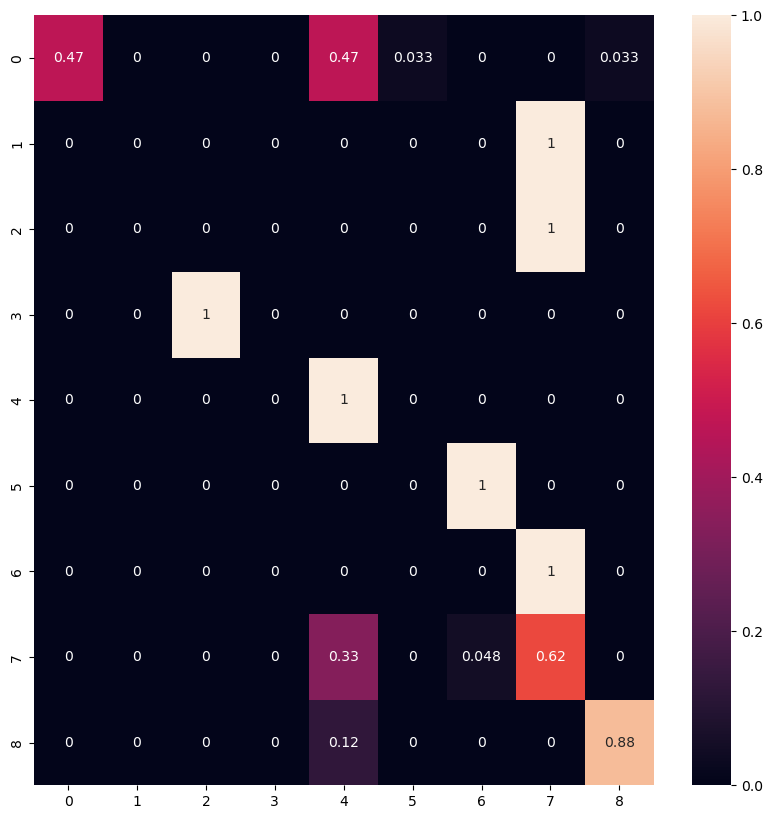

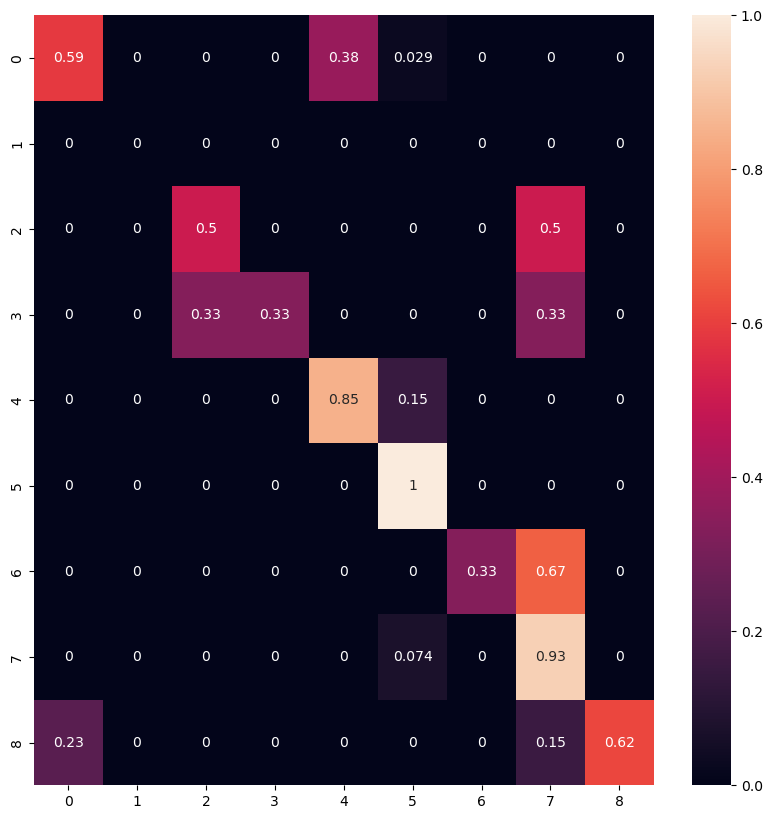

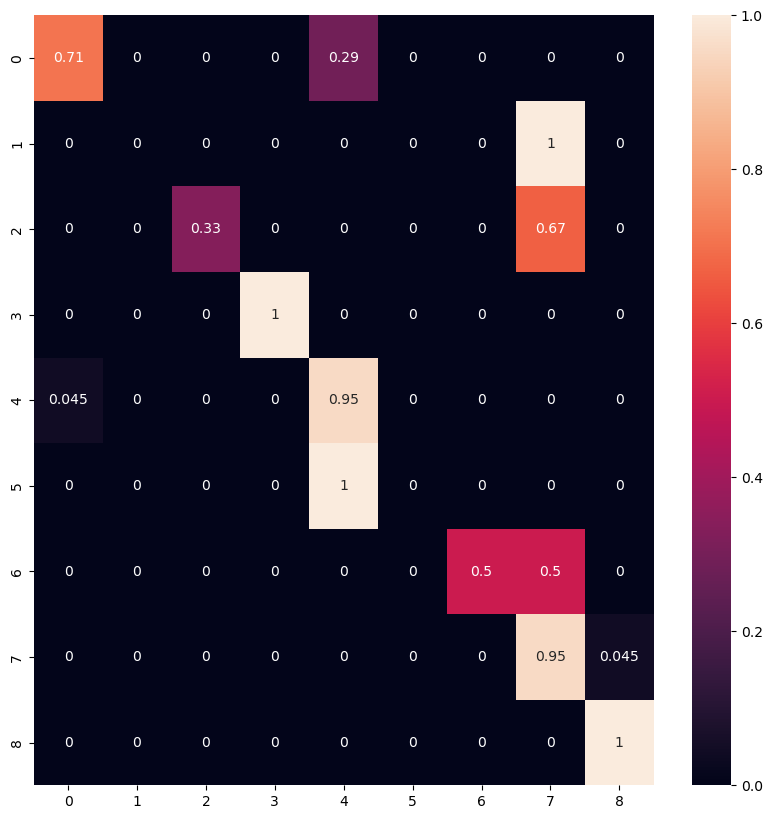

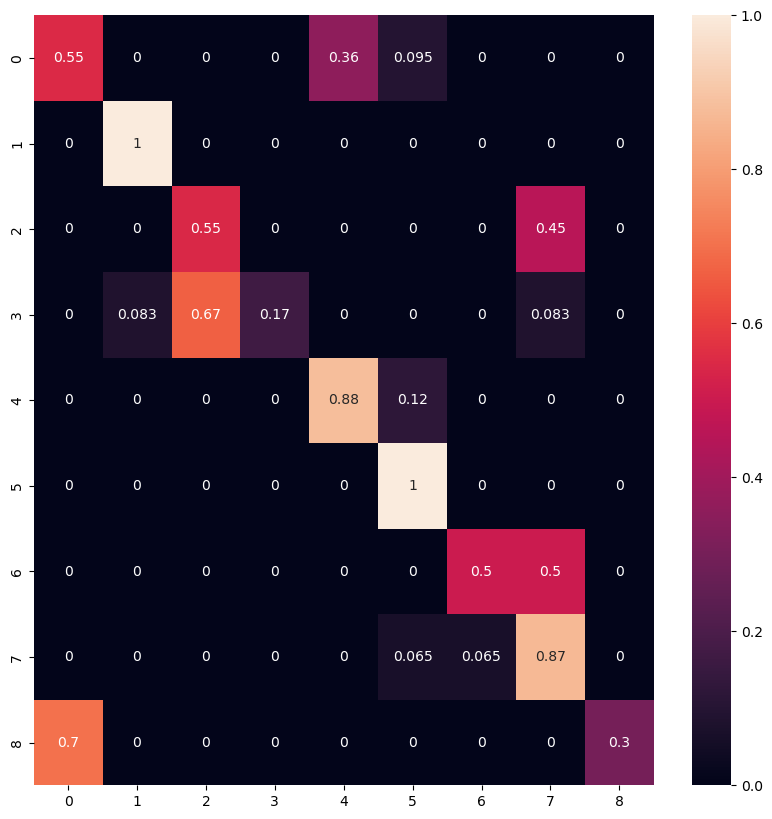

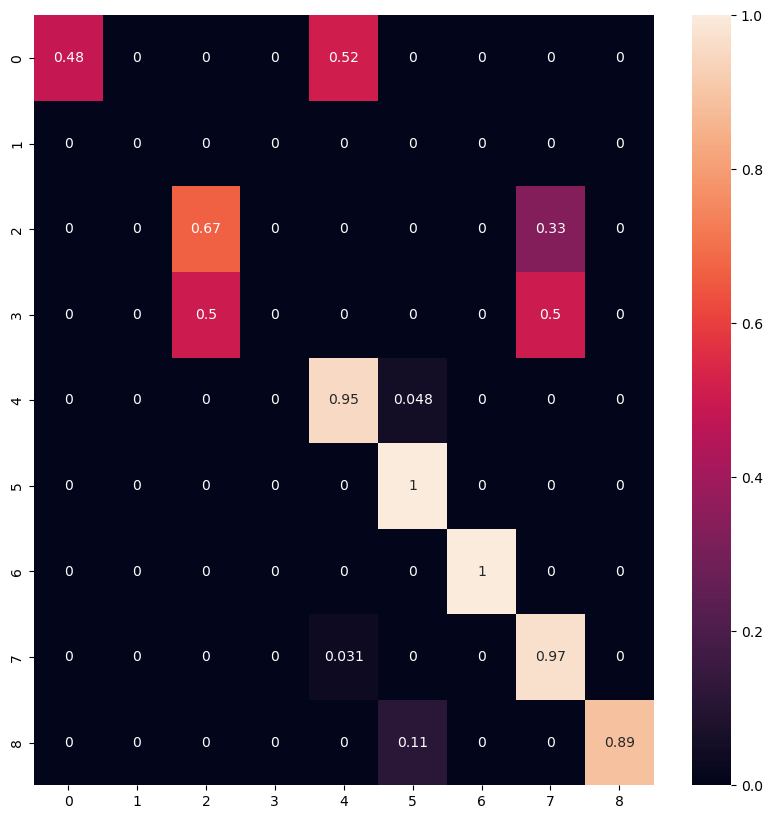

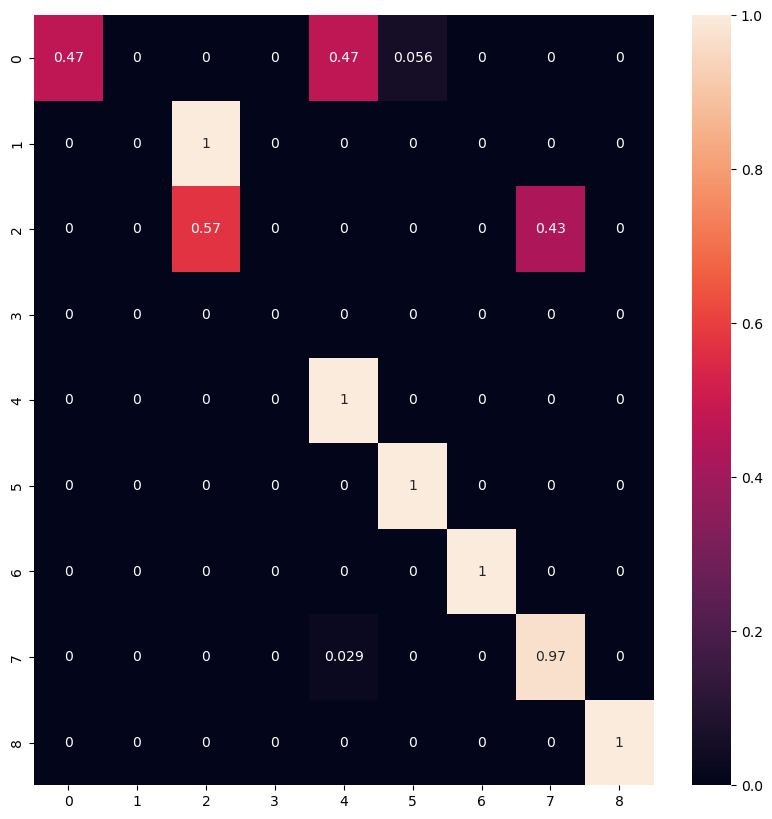

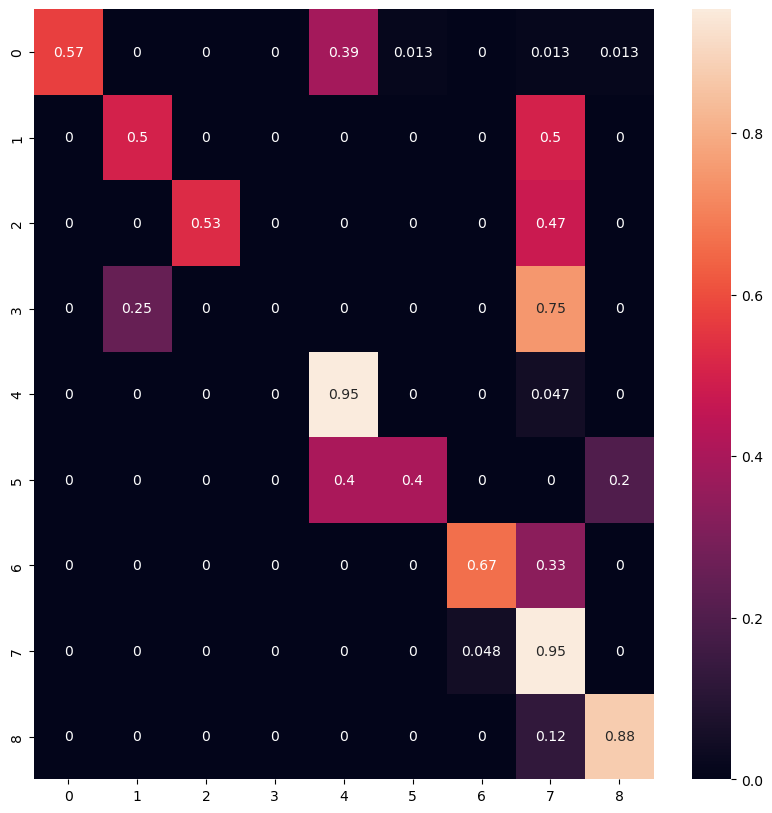

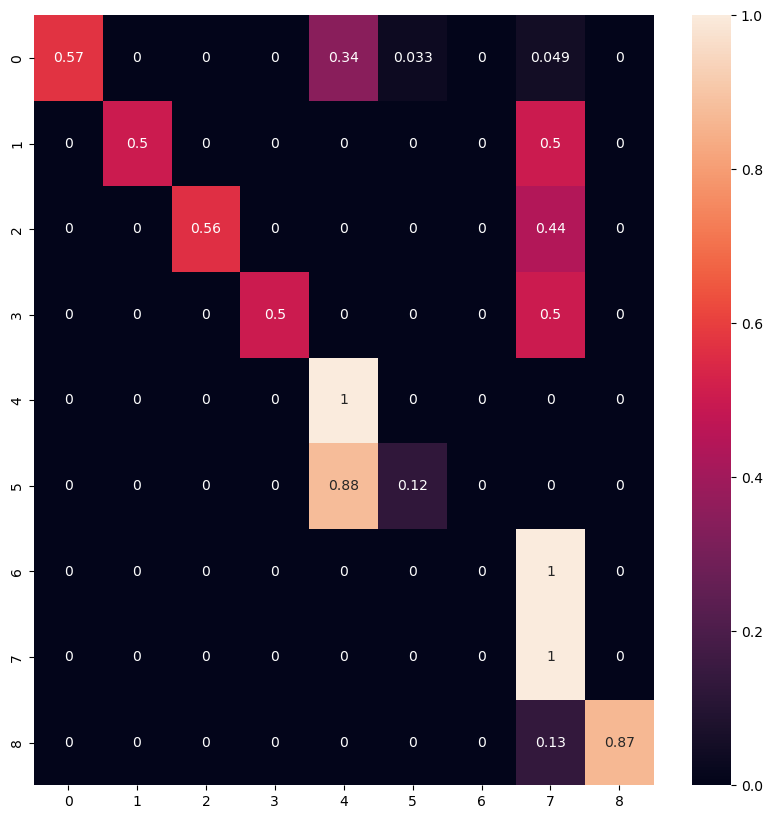

In [61]:
test_set=os.listdir('./test_set_df_acc_window8')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb

In [62]:
test_set=os.listdir('./test_set_df')
test_set

['.DS_Store',
 'S08T1.csv',
 'S08T2.csv',
 'N11T1.csv',
 'N11T2.csv',
 'N06T1.csv',
 'S02T2.csv',
 'N06T2.csv',
 'S02T1.csv',
 'N02T2.csv',
 'N02T1.csv',
 'S03T1.csv',
 'S03T2.csv']

In [63]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df_acc_window8/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window8/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn_test():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after1=[]
    after4=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window8/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     plt.savefig(f"./image/rf_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,4.000000,11.000000,6.000000,12.000000,8.000000,9.000000,12.000000,12.000000
mean,0.762698,0.749956,0.726821,0.541667,0.735798,0.565324,0.724115,0.436418,0.735185,0.871505,0.810964
std,0.081393,0.085272,0.125983,0.083333,0.147536,0.274627,0.116472,0.150878,0.235178,0.097691,0.197063
min,0.580645,0.559361,0.583333,0.500000,0.500000,0.153846,0.545455,0.181818,0.400000,0.619048,0.363636
25%,0.738697,0.730446,0.640223,0.500000,0.666667,0.500000,0.666369,0.388889,0.500000,0.846631,0.808123
50%,0.778869,0.768596,0.692341,0.500000,0.700000,0.535714,0.708287,0.500000,0.750000,0.877445,0.896057
75%,0.801923,0.785502,0.750579,0.541667,0.811111,0.642857,0.756944,0.517857,1.000000,0.929744,0.919643
max,0.911765,0.911664,1.000000,0.666667,1.000000,1.000000,0.936170,0.571429,1.000000,1.000000,1.000000


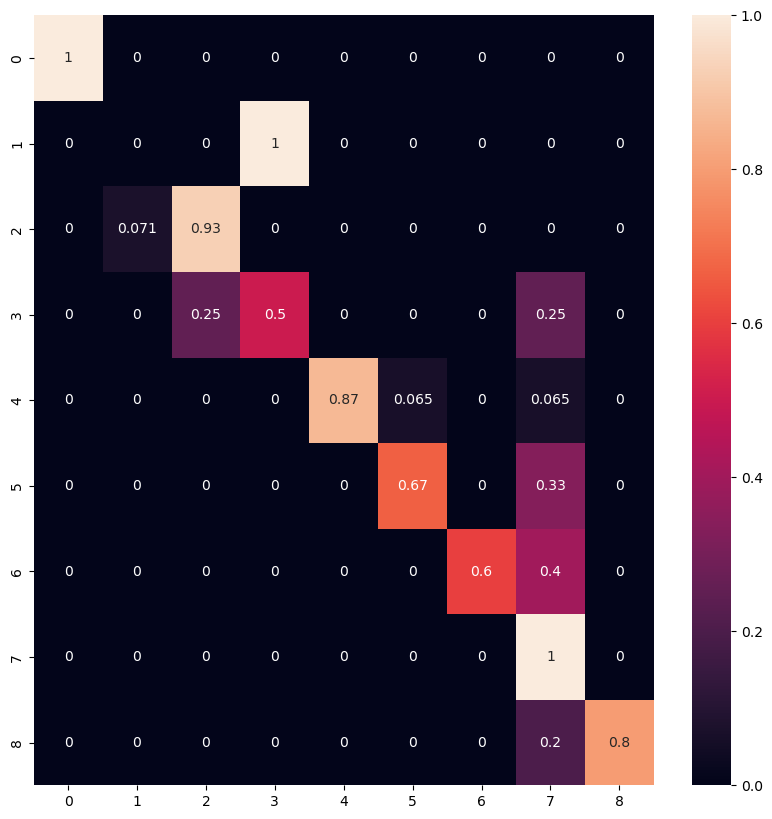

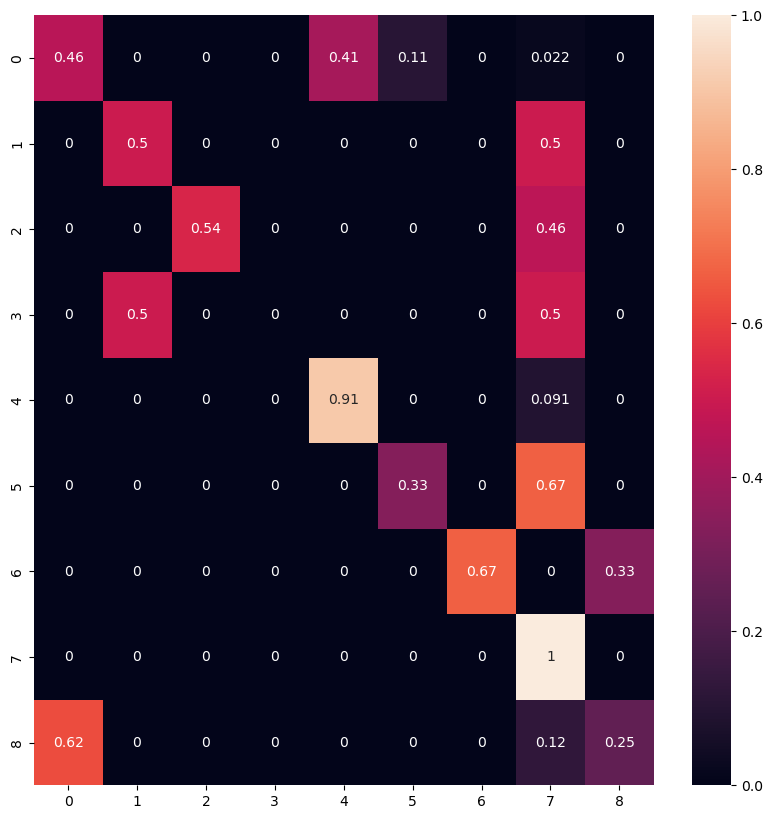

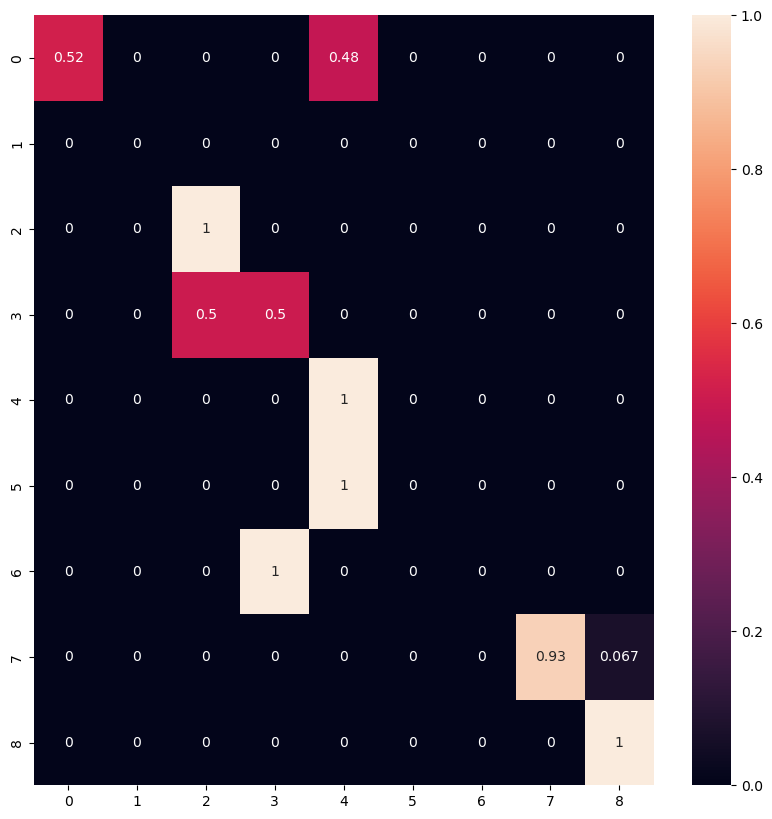

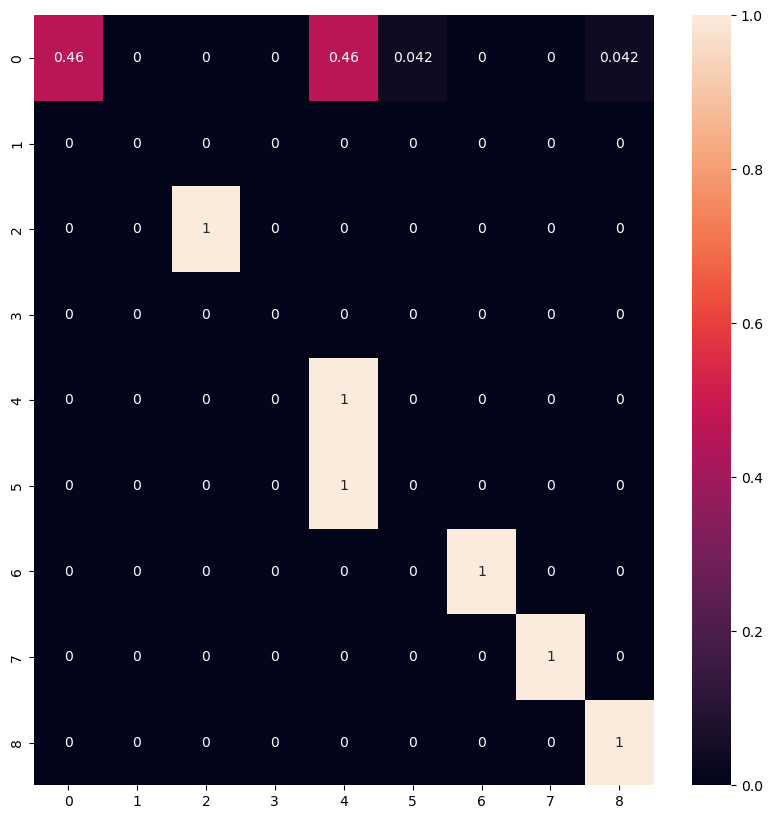

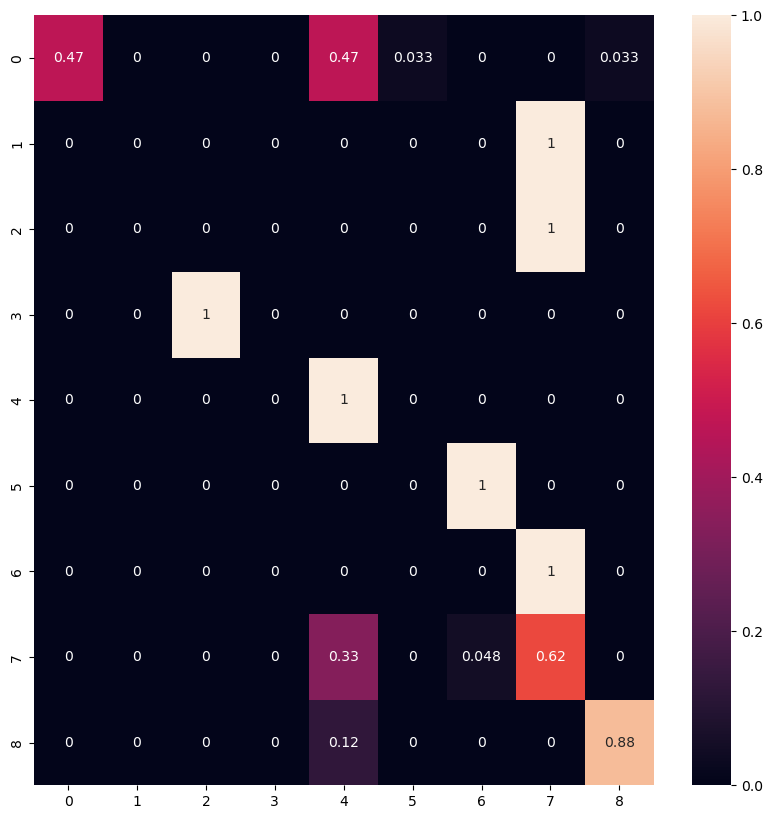

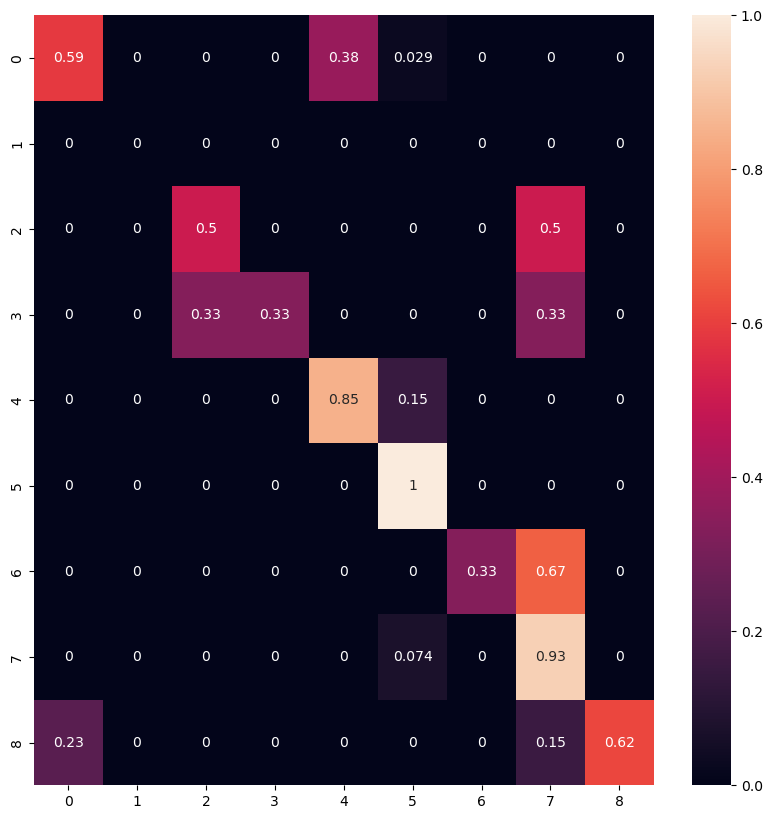

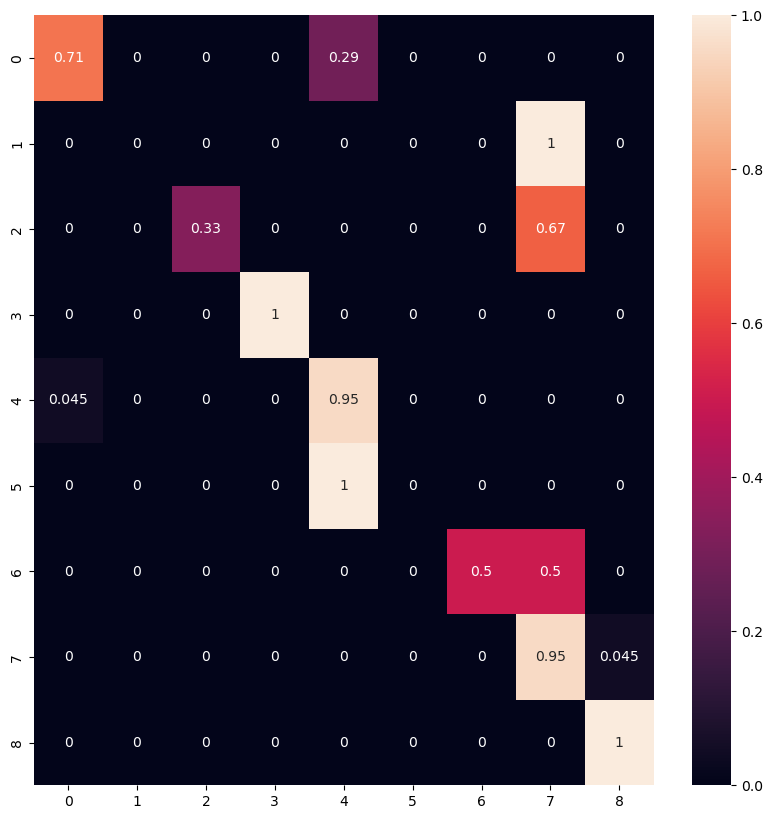

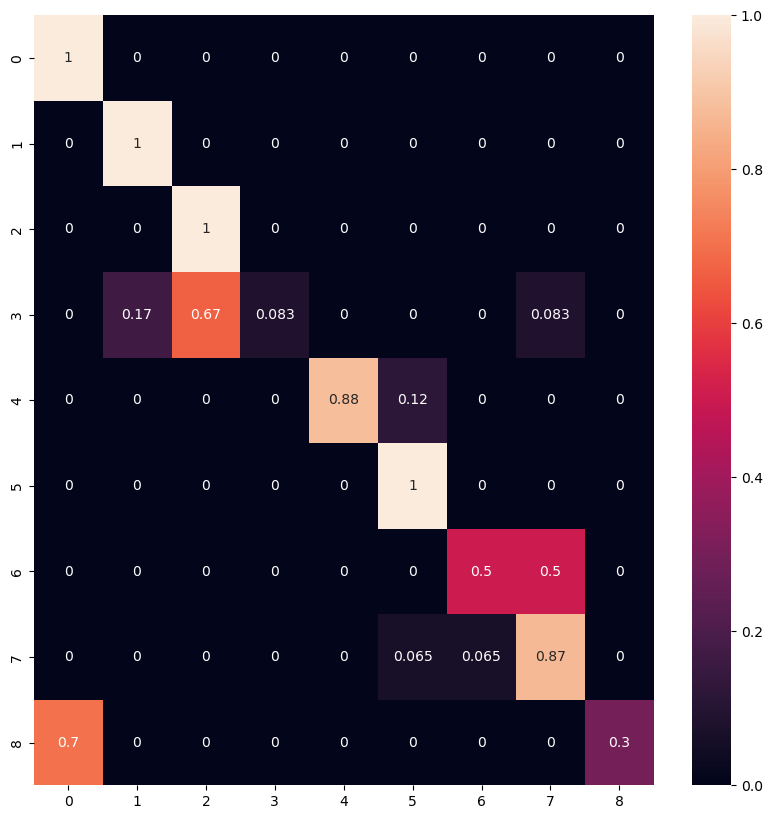

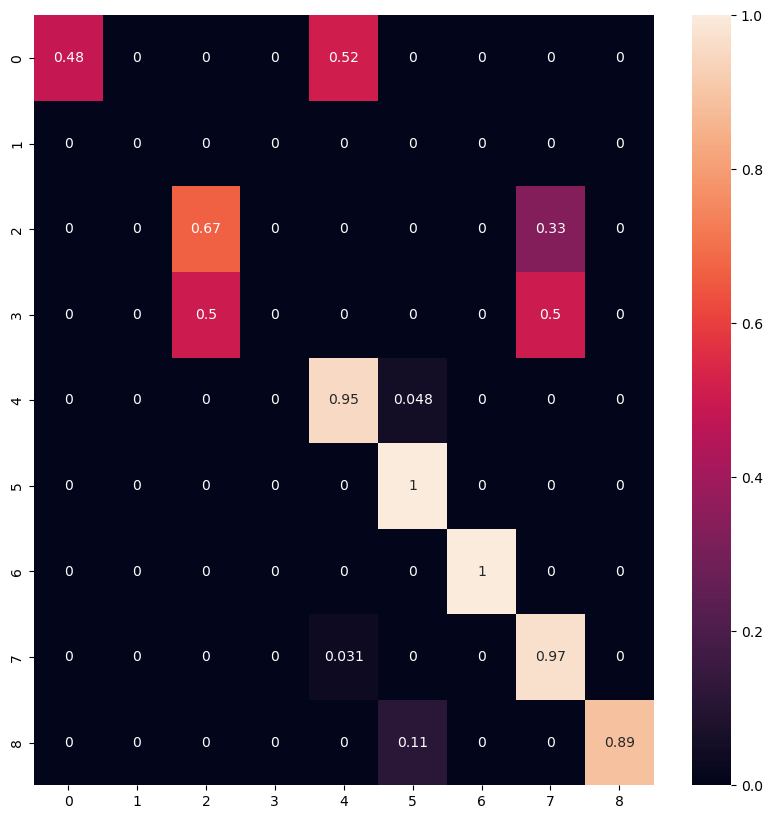

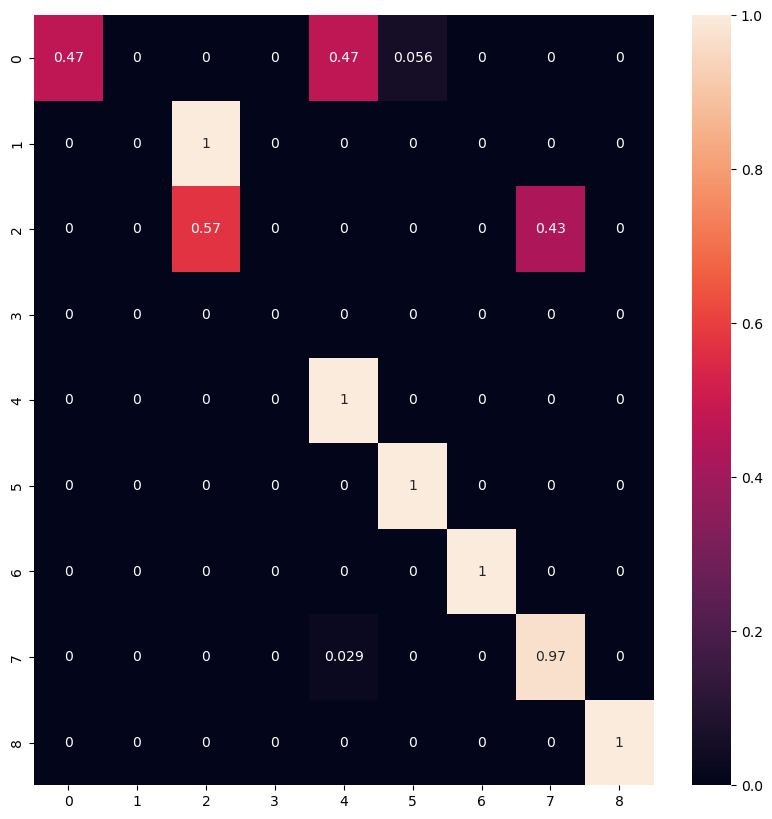

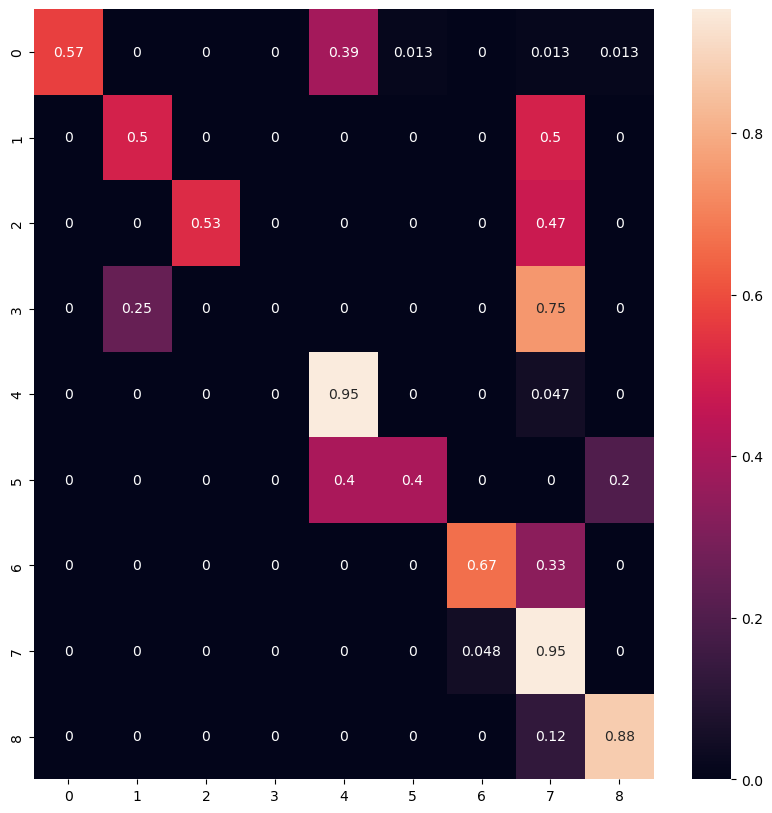

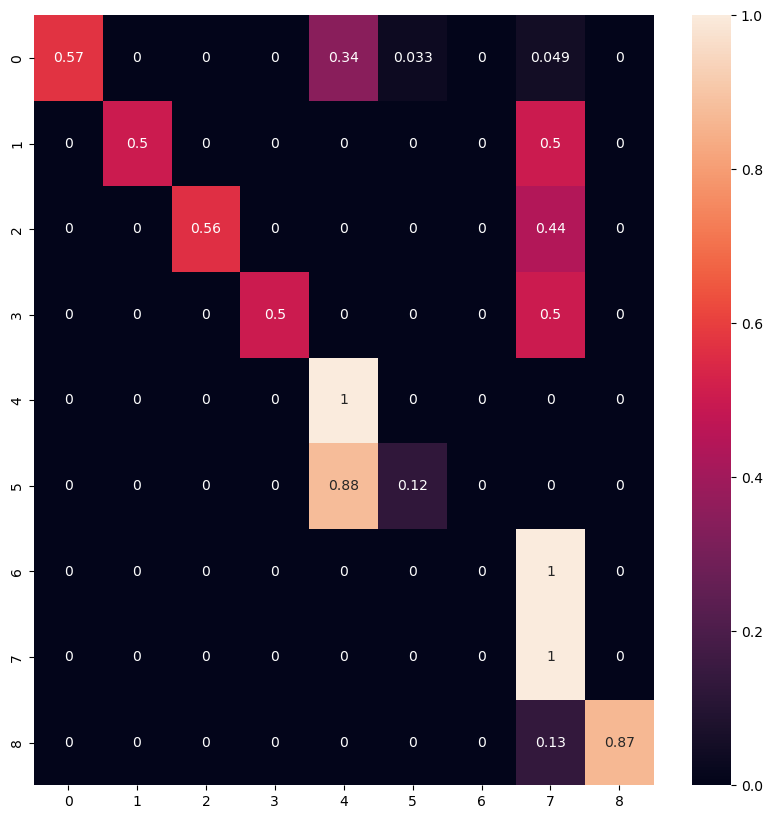

In [64]:
test_set=os.listdir('./test_set_df_acc_window8')
out_rf=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df.describe()

In [65]:
def output_xgb_2(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window8/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window8/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn_test():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window8/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


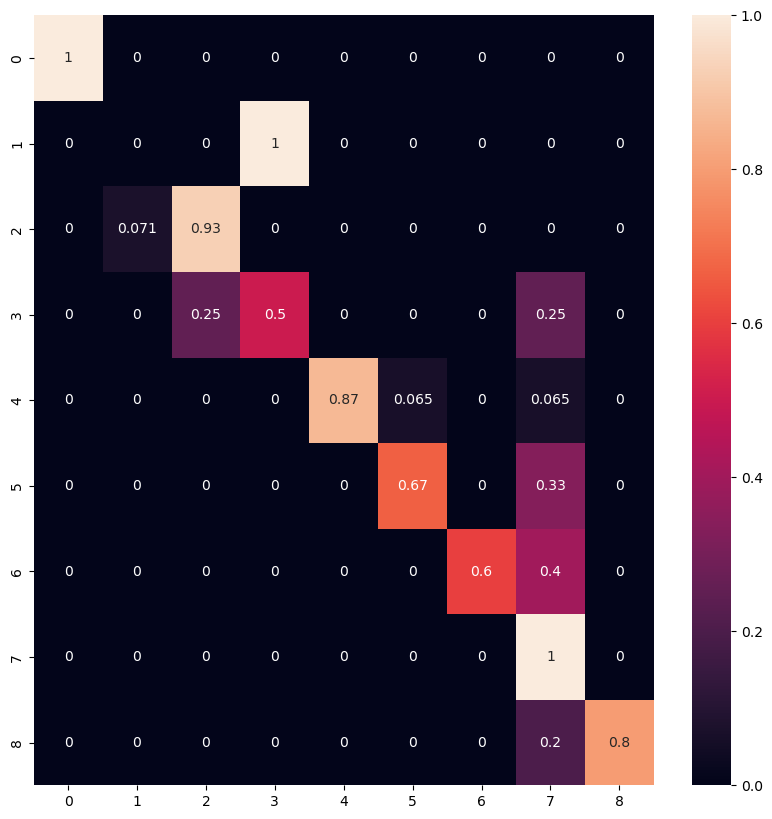

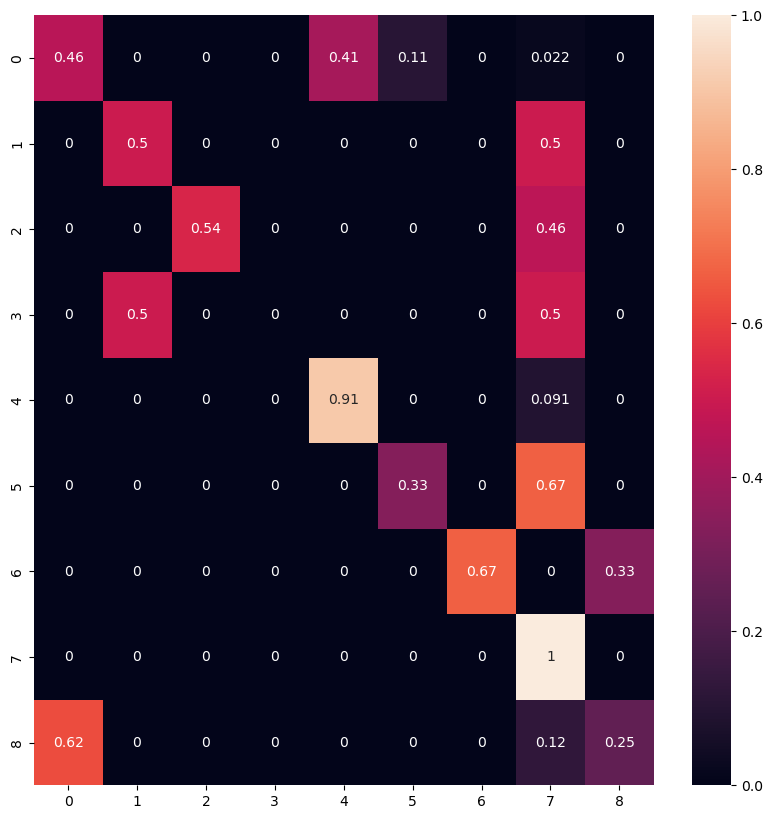

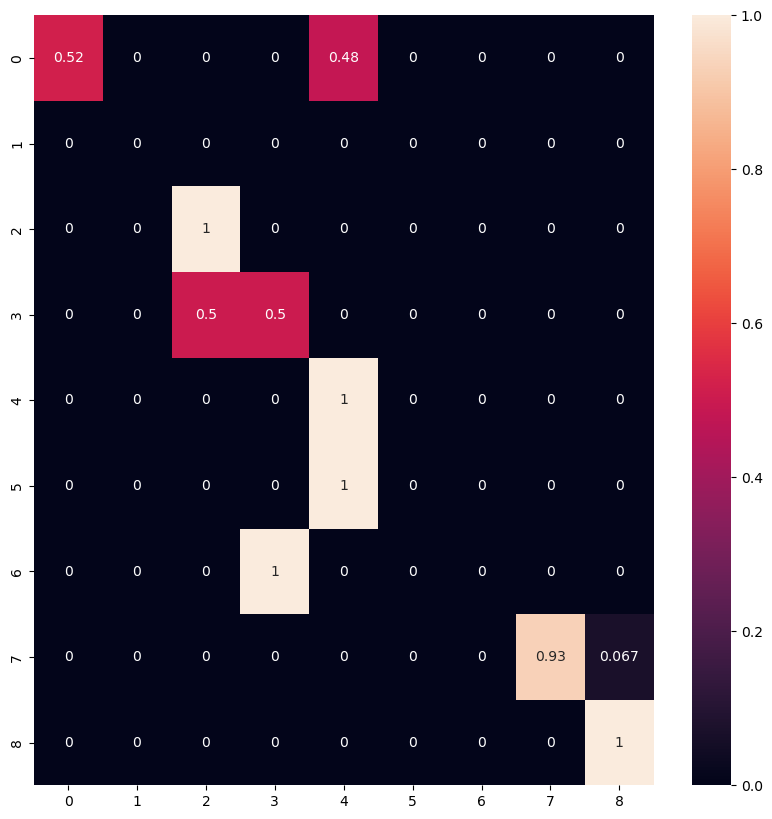

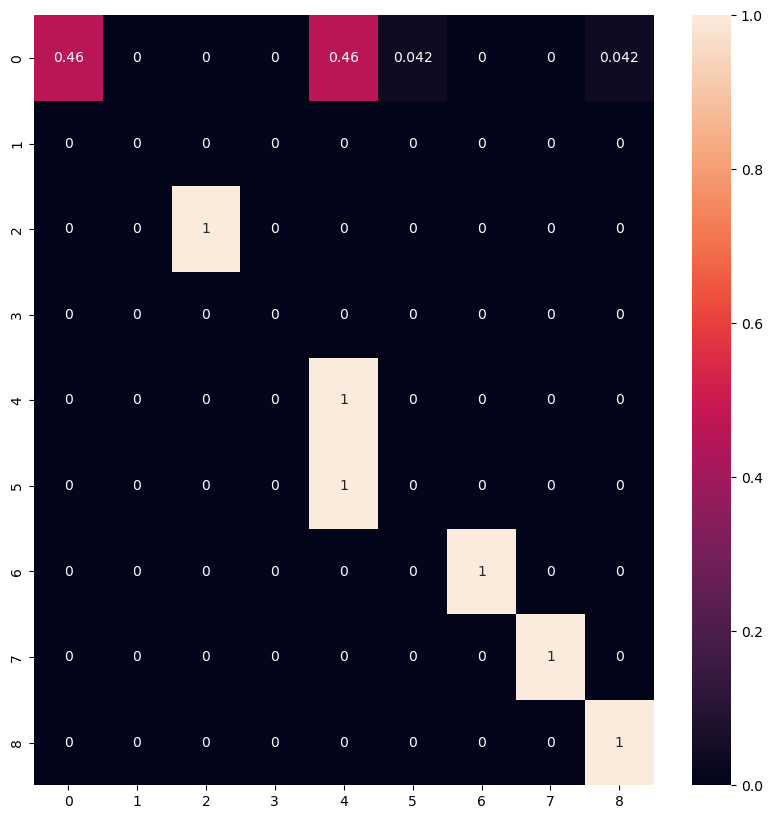

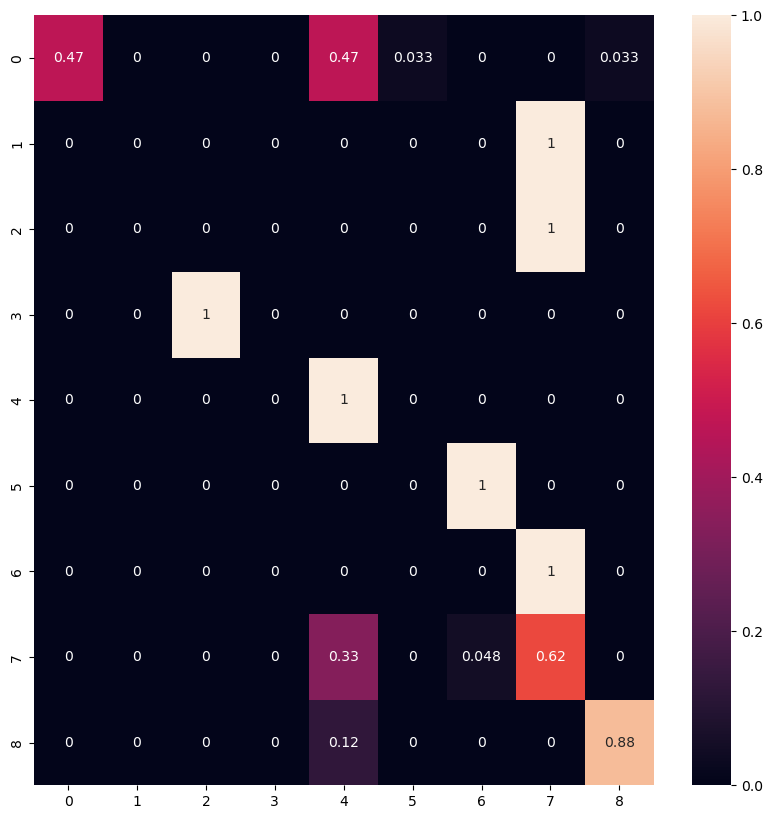

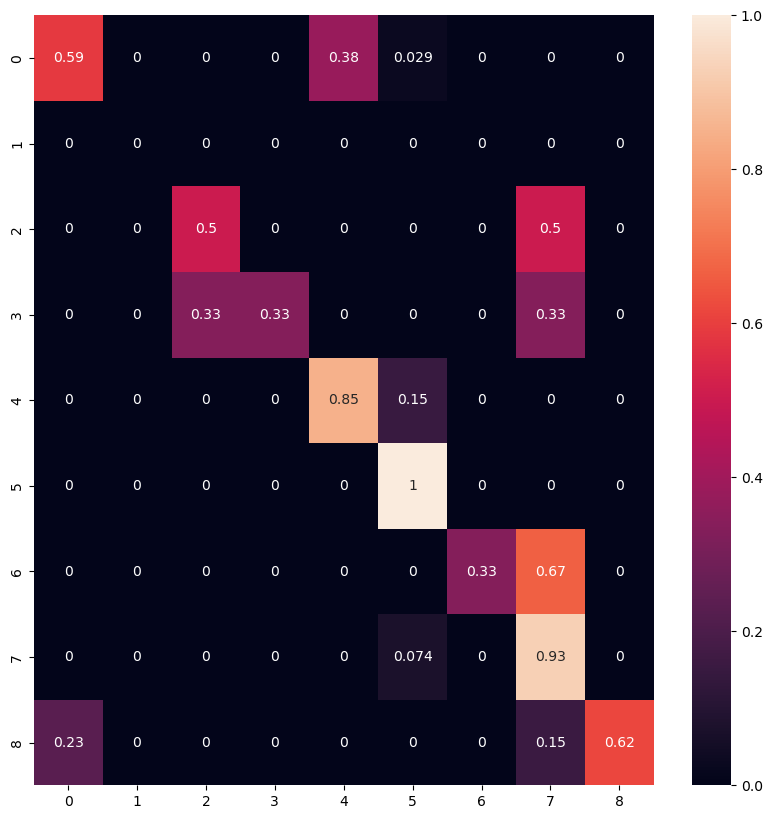

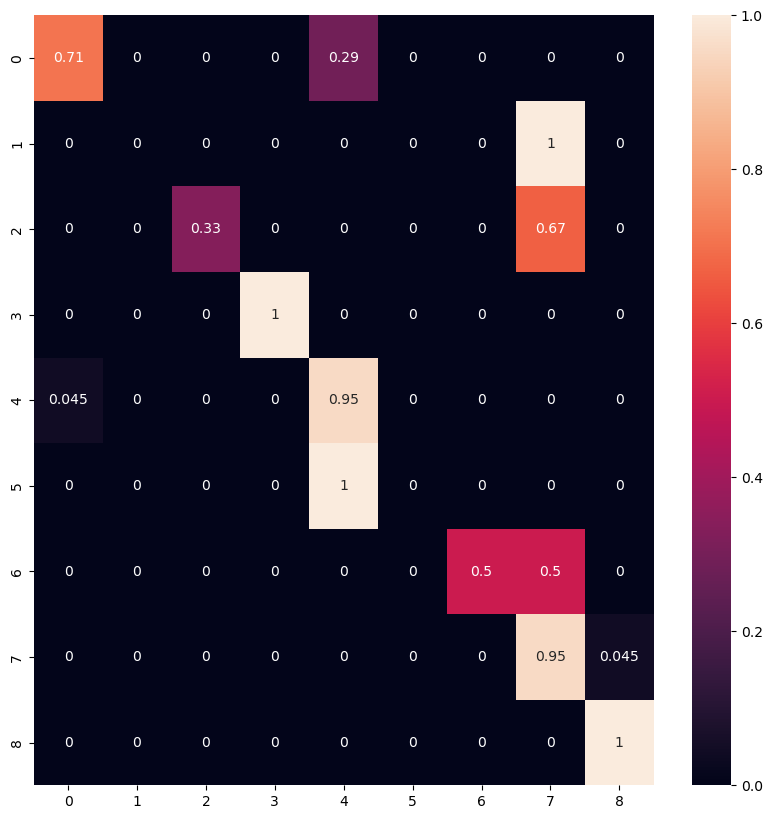

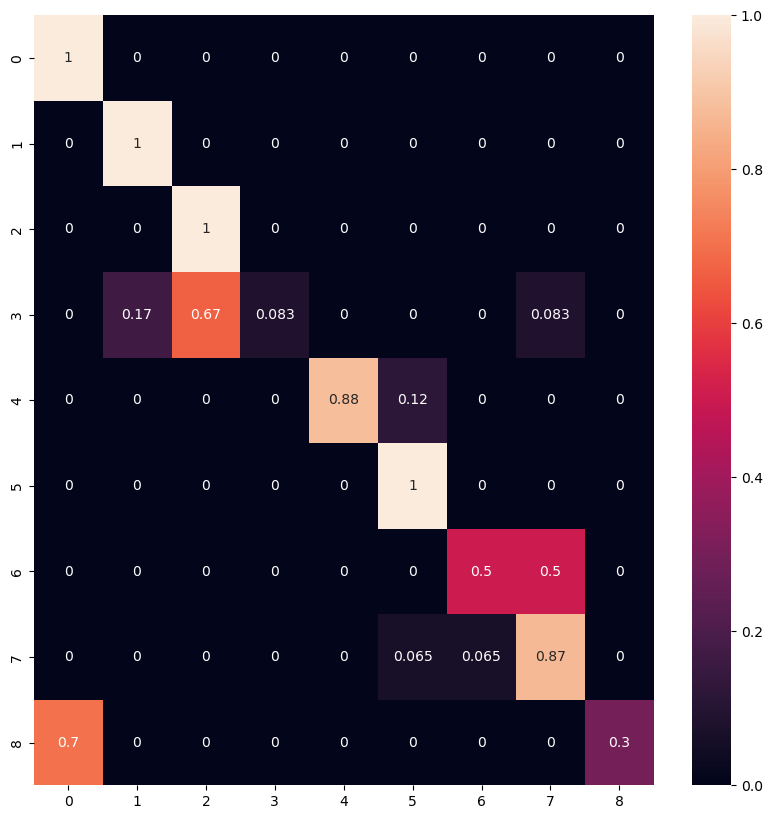

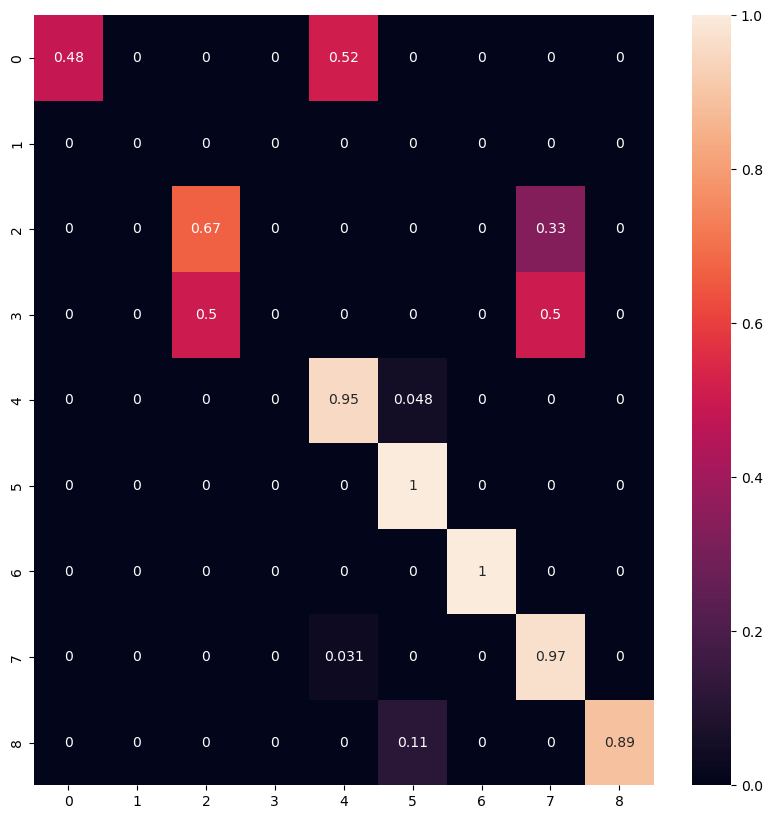

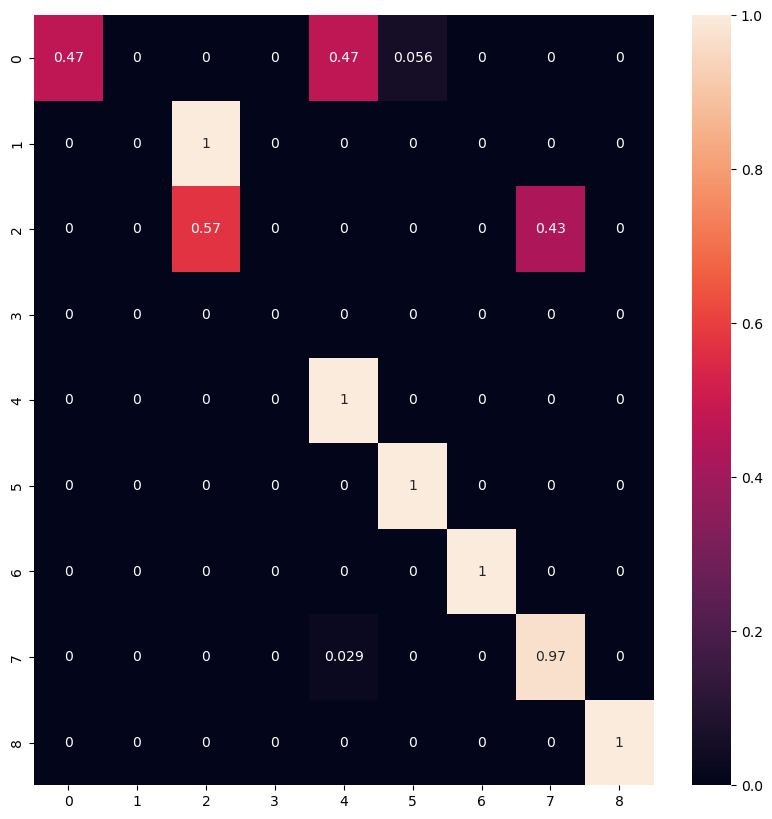

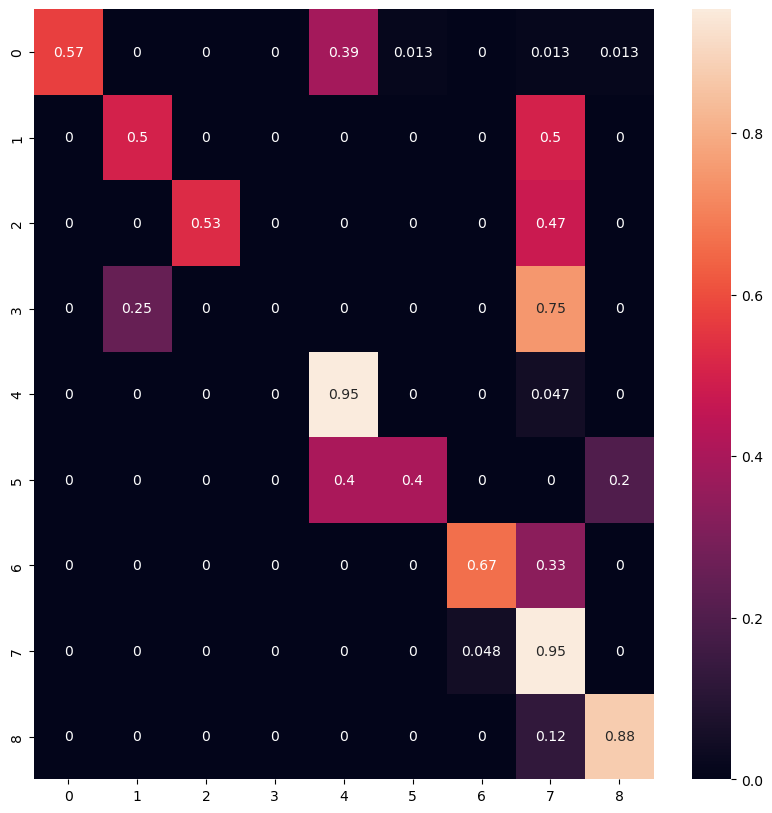

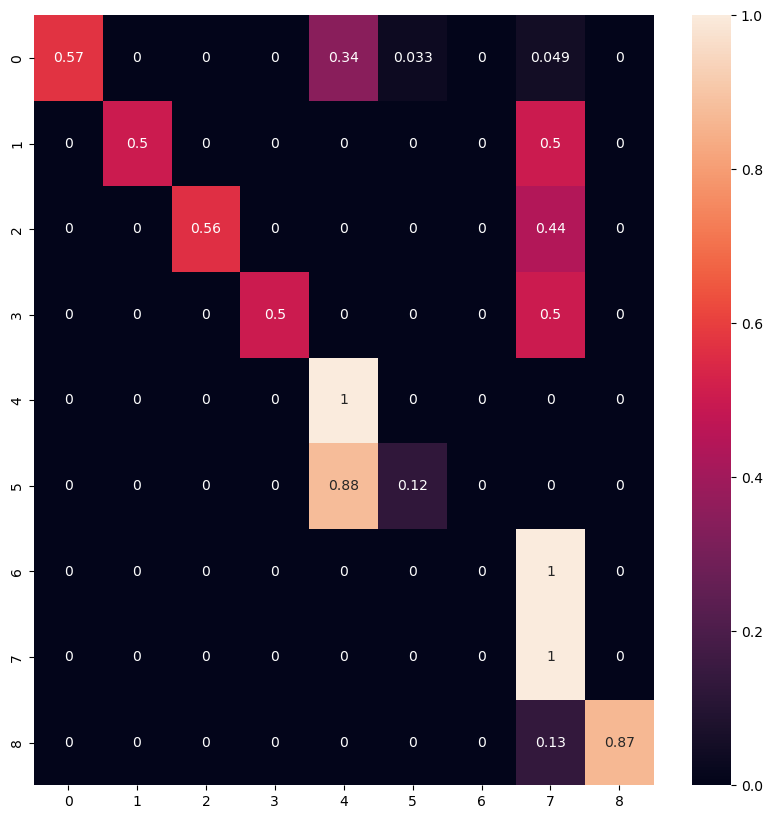

In [66]:
test_set=os.listdir('./test_set_df_acc_window8')
out_xgb2=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_xgb2)
out_df2=pd.DataFrame(out_xgb2,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])


In [67]:
def output_ada(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window8/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window8/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn_test():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window8/smote_VC2_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [68]:
# test_set=os.listdir('./test_set_df_acc_window8')
# out_ada=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_ada(ID,out_ada)
# out_ada=pd.DataFrame(out_ada,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])

In [69]:
out_df.describe()#HGBC not rf model :(  HGBC HGBC

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,4.000000,11.000000,6.000000,12.000000,8.000000,9.000000,12.000000,12.000000
mean,0.762698,0.749956,0.726821,0.541667,0.735798,0.565324,0.724115,0.436418,0.735185,0.871505,0.810964
std,0.081393,0.085272,0.125983,0.083333,0.147536,0.274627,0.116472,0.150878,0.235178,0.097691,0.197063
min,0.580645,0.559361,0.583333,0.500000,0.500000,0.153846,0.545455,0.181818,0.400000,0.619048,0.363636
25%,0.738697,0.730446,0.640223,0.500000,0.666667,0.500000,0.666369,0.388889,0.500000,0.846631,0.808123
50%,0.778869,0.768596,0.692341,0.500000,0.700000,0.535714,0.708287,0.500000,0.750000,0.877445,0.896057
75%,0.801923,0.785502,0.750579,0.541667,0.811111,0.642857,0.756944,0.517857,1.000000,0.929744,0.919643
max,0.911765,0.911664,1.000000,0.666667,1.000000,1.000000,0.936170,0.571429,1.000000,1.000000,1.000000


In [70]:
out_df_xgb.describe()#XGB HGBC

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,4.000000,11.000000,6.000000,12.000000,8.000000,9.000000,12.000000,12.000000
mean,0.742110,0.729365,0.706062,0.583333,0.682898,0.547619,0.707754,0.397895,0.735185,0.854826,0.810964
std,0.094617,0.094941,0.104257,0.096225,0.152837,0.259949,0.080328,0.144954,0.235178,0.103633,0.197063
min,0.580645,0.559361,0.583333,0.500000,0.480000,0.285714,0.545455,0.181818,0.400000,0.619048,0.363636
25%,0.680725,0.670629,0.640854,0.500000,0.600000,0.375000,0.679492,0.286325,0.500000,0.823077,0.808123
50%,0.752397,0.739733,0.683929,0.583333,0.666667,0.500000,0.708287,0.450000,0.750000,0.858522,0.896057
75%,0.783192,0.778176,0.727746,0.666667,0.710000,0.625000,0.736280,0.500000,1.000000,0.929744,0.919643
max,0.950000,0.933935,0.978723,0.666667,1.000000,1.000000,0.880000,0.571429,1.000000,1.000000,1.000000


In [71]:
out_df2.describe()#XGB XGB

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,4.000000,11.000000,6.000000,12.000000,8.000000,9.000000,12.000000,12.000000
mean,0.762698,0.749956,0.726821,0.541667,0.735798,0.565324,0.724115,0.436418,0.735185,0.871505,0.810964
std,0.081393,0.085272,0.125983,0.083333,0.147536,0.274627,0.116472,0.150878,0.235178,0.097691,0.197063
min,0.580645,0.559361,0.583333,0.500000,0.500000,0.153846,0.545455,0.181818,0.400000,0.619048,0.363636
25%,0.738697,0.730446,0.640223,0.500000,0.666667,0.500000,0.666369,0.388889,0.500000,0.846631,0.808123
50%,0.778869,0.768596,0.692341,0.500000,0.700000,0.535714,0.708287,0.500000,0.750000,0.877445,0.896057
75%,0.801923,0.785502,0.750579,0.541667,0.811111,0.642857,0.756944,0.517857,1.000000,0.929744,0.919643
max,0.911765,0.911664,1.000000,0.666667,1.000000,1.000000,0.936170,0.571429,1.000000,1.000000,1.000000


In [72]:
# out_ada.describe()